In [1]:
pip install library

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [7]:
shot_data = pd.read_csv('NBA_2023_Shots.csv')

In [8]:
#acquiring the head of the data

shot_data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5


In [9]:
#exploring with info

shot_data.info

<bound method DataFrame.info of         SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  \
0           2023  2022-23  1610612764  Washington Wizards     203078   
1           2023  2022-23  1610612764  Washington Wizards     204001   
2           2023  2022-23  1610612764  Washington Wizards    1628420   
3           2023  2022-23  1610612764  Washington Wizards     204001   
4           2023  2022-23  1610612764  Washington Wizards    1630166   
...          ...      ...         ...                 ...        ...   
217215      2023  2022-23  1610612737       Atlanta Hawks    1631495   
217216      2023  2022-23  1610612737       Atlanta Hawks    1631495   
217217      2023  2022-23  1610612737       Atlanta Hawks    1628981   
217218      2023  2022-23  1610612737       Atlanta Hawks    1628981   
217219      2023  2022-23  1610612737       Atlanta Hawks    1631495   

               PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0             Bradley 

In [10]:
#exploring my favorite player

greek_freak = "Giannis Antetokounmpo"
shot_data[shot_data.PLAYER_NAME == greek_freak].head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
94410,2023,2022-23,1610612749,Milwaukee Bucks,203507,Giannis Antetokounmpo,F,PF,10-20-2022,22200015,...,Restricted Area,Center,C,Less Than 8 ft.,-2.7,6.35,2,1,8,44
94412,2023,2022-23,1610612749,Milwaukee Bucks,203507,Giannis Antetokounmpo,F,PF,10-20-2022,22200015,...,Restricted Area,Center,C,Less Than 8 ft.,0.9,6.15,1,1,7,30
94422,2023,2022-23,1610612749,Milwaukee Bucks,203507,Giannis Antetokounmpo,F,PF,10-20-2022,22200015,...,Above the Break 3,Left Side Center,LC,24+ ft.,15.7,27.95,27,1,1,20
94424,2023,2022-23,1610612749,Milwaukee Bucks,203507,Giannis Antetokounmpo,F,PF,10-20-2022,22200015,...,Mid-Range,Left Side Center,LC,16-24 ft.,11.0,21.45,19,1,0,30
94430,2023,2022-23,1610612749,Milwaukee Bucks,203507,Giannis Antetokounmpo,F,PF,10-20-2022,22200015,...,Restricted Area,Center,C,Less Than 8 ft.,-1.8,8.35,3,2,7,28


In [11]:
#but first I'll make this a df since I can't call anything
shot_df = pd.DataFrame(shot_data)

In [12]:
#checking for missing values

missing = pd.concat([shot_df.isnull().sum(), 100 * shot_df.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count', ascending=False)

,Count,%
POSITION_GROUP,1431,0.658779
POSITION,1431,0.658779
SEASON_1,0,0.000000
ACTION_TYPE,0,0.000000
MINS_LEFT,0,0.000000
QUARTER,0,0.000000
SHOT_DISTANCE,0,0.000000
LOC_Y,0,0.000000
LOC_X,0,0.000000
ZONE_RANGE,0,0.000000


In [13]:
#exploring the null values

null_values = shot_df[(shot_data['POSITION_GROUP'].isnull()) & (shot_data['POSITION'].isnull())]
print(null_values)

        SEASON_1 SEASON_2     TEAM_ID          TEAM_NAME  PLAYER_ID  \
14492       2023  2022-23  1610612761    Toronto Raptors    1628384   
14495       2023  2022-23  1610612761    Toronto Raptors    1628384   
14507       2023  2022-23  1610612761    Toronto Raptors    1628384   
14515       2023  2022-23  1610612761    Toronto Raptors    1628384   
14530       2023  2022-23  1610612761    Toronto Raptors    1628384   
...          ...      ...         ...                ...        ...   
116189      2023  2022-23  1610612763  Memphis Grizzlies    1630214   
116242      2023  2022-23  1610612763  Memphis Grizzlies    1630214   
116250      2023  2022-23  1610612763  Memphis Grizzlies    1630214   
116251      2023  2022-23  1610612763  Memphis Grizzlies    1630214   
116252      2023  2022-23  1610612763  Memphis Grizzlies    1630214   

           PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
14492     O.G. Anunoby            NaN      NaN  10-19-2022  22200008  

In [14]:
null_positions = null_values["PLAYER_NAME"]
null_positions = null_positions.unique()
print(null_positions)

['O.G. Anunoby' 'Jeff Dowtin Jr.' 'John Butler Jr.' 'Chance Comanche'
 'AJ Green' 'Xavier Tillman']


In [15]:
#Oh no! These are players I know the positions of. It's an easy fix

shot_df.loc[shot_df['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION'] = 'SF-SG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION'] = 'PG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION'] = 'PF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Chance Comanche', 'POSITION'] = 'PF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'AJ Green', 'POSITION'] = 'SG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION'] = 'C'

In [16]:
#checking to see if I got rid of all the null values

null_values = shot_df[(shot_data['POSITION_GROUP'].isnull()) & (shot_data['POSITION'].isnull())]
print(null_values)

#success!

Empty DataFrame
Columns: [SEASON_1, SEASON_2, TEAM_ID, TEAM_NAME, PLAYER_ID, PLAYER_NAME, POSITION_GROUP, POSITION, GAME_DATE, GAME_ID, HOME_TEAM, AWAY_TEAM, EVENT_TYPE, SHOT_MADE, ACTION_TYPE, SHOT_TYPE, BASIC_ZONE, ZONE_NAME, ZONE_ABB, ZONE_RANGE, LOC_X, LOC_Y, SHOT_DISTANCE, QUARTER, MINS_LEFT, SECS_LEFT]
Index: []

[0 rows x 26 columns]


In [17]:
#checking out the categorical columns

shot_df.select_dtypes(object)


,SEASON_2,TEAM_NAME,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE
0,2022-23,Washington Wizards,Bradley Beal,G,SG,10-19-2022,IND,WAS,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.
1,2022-23,Washington Wizards,Kristaps Porzingis,C,C,10-19-2022,IND,WAS,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.
2,2022-23,Washington Wizards,Monte Morris,G,PG,10-19-2022,IND,WAS,Made Shot,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.
3,2022-23,Washington Wizards,Kristaps Porzingis,C,C,10-19-2022,IND,WAS,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.
4,2022-23,Washington Wizards,Deni Avdija,F,SF,10-19-2022,IND,WAS,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217215,2022-23,Atlanta Hawks,Donovan Williams,G,SG,04-09-2023,BOS,ATL,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.
217216,2022-23,Atlanta Hawks,Donovan Williams,G,SG,04-09-2023,BOS,ATL,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center,RC,24+ ft.
217217,2022-23,Atlanta Hawks,Bruno Fernando,C,C,04-09-2023,BOS,ATL,Made Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.
217218,2022-23,Atlanta Hawks,Bruno Fernando,C,C,04-09-2023,BOS,ATL,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.


In [18]:
#understanding columns of interest and their respective data



shot_types = shot_df["ACTION_TYPE"]
shot_types = shot_types.unique()
print(shot_types)

position_names = shot_df["POSITION"]
position_names = position_names.unique()
print(position_names)

basic_zone_names = shot_df["BASIC_ZONE"]
basic_zone_names = basic_zone_names.unique()
print(basic_zone_names)

zone_names = shot_df["ZONE_NAME"]
zone_names = zone_names.unique()
print(zone_names)

ranges = shot_df["ZONE_RANGE"]
ranges = ranges.unique()
print(ranges)

['Jump Shot' 'Step Back Jump shot' 'Running Finger Roll Layup Shot'
 'Cutting Dunk Shot' 'Driving Layup Shot' 'Pullup Jump shot'
 'Driving Finger Roll Layup Shot' 'Tip Layup Shot' 'Turnaround Jump Shot'
 'Driving Reverse Layup Shot' 'Running Reverse Layup Shot' 'Layup Shot'
 'Running Pull-Up Jump Shot' 'Dunk Shot' 'Reverse Layup Shot'
 'Running Dunk Shot' 'Floating Jump shot' 'Driving Floating Jump Shot'
 'Cutting Layup Shot' 'Putback Layup Shot' 'Turnaround Fadeaway shot'
 'Running Jump Shot' 'Turnaround Hook Shot' 'Running Layup Shot'
 'Driving Hook Shot' 'Driving Dunk Shot' 'Fadeaway Jump Shot'
 'Running Alley Oop Dunk Shot' 'Turnaround Fadeaway Bank Jump Shot'
 'Cutting Finger Roll Layup Shot' 'Running Alley Oop Layup Shot'
 'Tip Dunk Shot' 'Driving Floating Bank Jump Shot' 'Alley Oop Dunk Shot'
 'Putback Dunk Shot' 'Hook Shot' 'Alley Oop Layup shot'
 'Turnaround Bank shot' 'Hook Bank Shot' 'Jump Bank Shot'
 'Driving Bank Hook Shot' 'Fadeaway Bank shot' 'Reverse Dunk Shot'
 'Finger

In [19]:
#am curious what SF-SG classifies as

sf_sg_positions = shot_df[shot_df['POSITION'] == "SF-SG"]
sf_sg_position_groups = sf_sg_positions['POSITION_GROUP'].value_counts()

print(sf_sg_position_groups)

POSITION_GROUP
F    520
Name: count, dtype: int64


In [20]:
#this seems important. I'm going to apply the POSITION_GROUP step onto the null fill-ins I did earlier

shot_df.loc[shot_df['POSITION'] == 'PF', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['POSITION'] == 'SF-SG', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['POSITION'] == 'PG', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['POSITION'] == 'SG', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['POSITION'] == 'C', 'POSITION_GROUP'] = 'C'

In [21]:
#lets run one test case to see if it worked
shot_df[shot_df['PLAYER_NAME'] == 'O.G. Anunoby']

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
14492,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,10-19-2022,22200008,...,Above the Break 3,Left Side Center,LC,24+ ft.,15.0,26.95,26,1,11,23
14495,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,10-19-2022,22200008,...,In The Paint (Non-RA),Left Side,L,8-16 ft.,5.6,14.45,10,1,9,42
14507,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,10-19-2022,22200008,...,Above the Break 3,Right Side Center,RC,24+ ft.,-8.9,29.35,25,1,1,15
14515,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,10-19-2022,22200008,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,2.1,10.05,5,2,9,24
14530,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,10-19-2022,22200008,...,Restricted Area,Center,C,Less Than 8 ft.,-0.1,4.65,0,2,1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21841,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,04-07-2023,22201206,...,Restricted Area,Center,C,Less Than 8 ft.,1.0,7.85,2,2,0,36
21843,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,04-07-2023,22201206,...,Mid-Range,Right Side,R,8-16 ft.,-8.7,6.55,8,3,11,47
21849,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,04-07-2023,22201206,...,Left Corner 3,Left Side,L,24+ ft.,23.7,6.05,23,3,8,20
21856,2023,2022-23,1610612761,Toronto Raptors,1628384,O.G. Anunoby,F,SF-SG,04-07-2023,22201206,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.2,20.95,25,3,4,8


In [22]:
#the last thing I want to do to clean the data is to concatenate minutes and seconds


shot_df["Time Left"] = pd.to_timedelta(shot_df["MINS_LEFT"], unit='m') + pd.to_timedelta(shot_df["SECS_LEFT"], unit='s')
shot_df["Time Left"] = shot_df["Time Left"].dt.total_seconds() / 60  # Convert total seconds to minutes
shot_df["Time Left"] = pd.to_datetime(shot_df["Time Left"], unit='m').dt.strftime("%M:%S")

In [23]:
shot_df

#success!

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Time Left
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20,11:20
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Center,C,24+ ft.,-0.4,31.45,26,1,10,52,10:52
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39,10:39
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31,10:31
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5,10:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217215,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,04-09-2023,22201216,...,Center,C,Less Than 8 ft.,-2.1,7.45,3,4,1,37,01:37
217216,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,04-09-2023,22201216,...,Right Side Center,RC,24+ ft.,-14.5,26.45,25,4,1,12,01:12
217217,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,04-09-2023,22201216,...,Center,C,Less Than 8 ft.,2.0,7.55,3,4,1,2,01:02
217218,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,04-09-2023,22201216,...,Center,C,24+ ft.,0.2,30.85,25,4,0,28,00:28


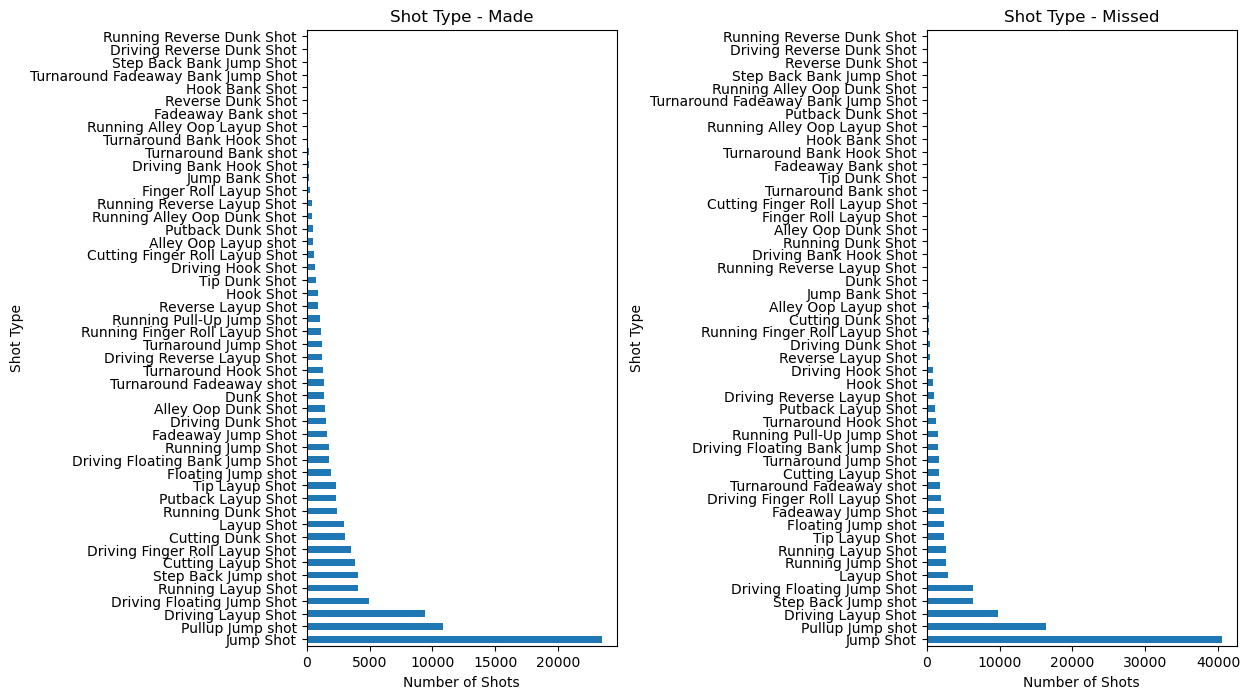

In [24]:
#now I'm curious about the value counts for each type of shot

made_shots = shot_data[shot_data["EVENT_TYPE"] == "Made Shot"]
missed_shots = shot_data[shot_data["EVENT_TYPE"] == "Missed Shot"]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
made_shots['ACTION_TYPE'].value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_ylabel("Shot Type")
ax[0].set_xlabel("Number of Shots")
ax[0].set_title("Shot Type - Made")
missed_shots['ACTION_TYPE'].value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_ylabel("Shot Type")
ax[1].set_xlabel("Number of Shots")
ax[1].set_title("Shot Type - Missed")

plt.subplots_adjust(wspace=1)

#nothing extraordinary here so far

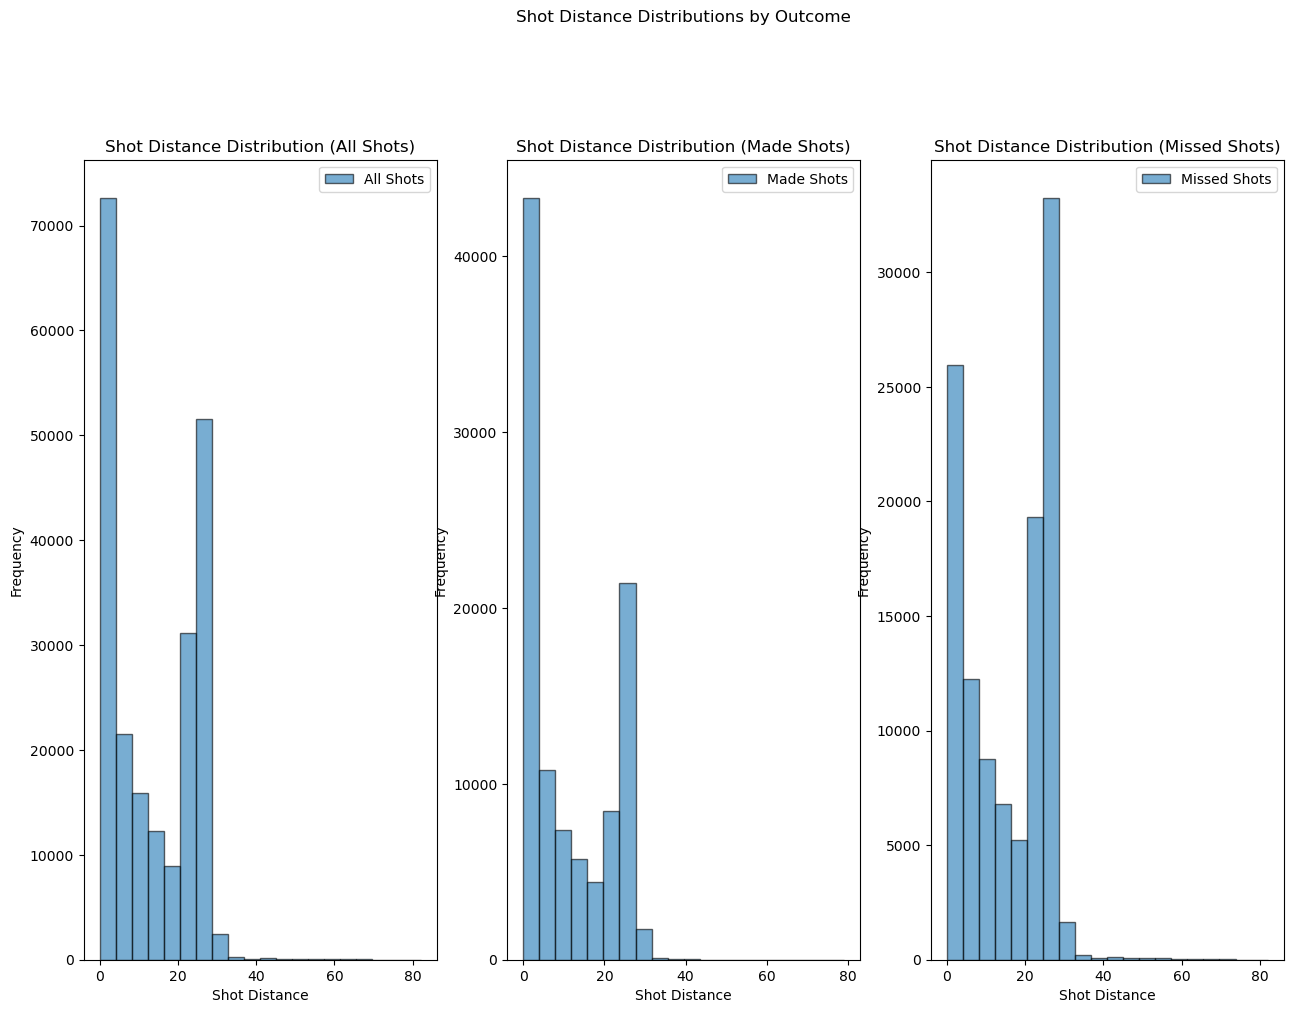

In [25]:
#checking for outliers in shot distance

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

ax1.hist(shot_df["SHOT_DISTANCE"], label="All Shots", alpha=0.6, bins=20, edgecolor="black")
ax1.set_xlabel("Shot Distance")
ax1.set_ylabel("Frequency")
ax1.set_title("Shot Distance Distribution (All Shots)")
ax1.legend()

ax2.hist(made_shots["SHOT_DISTANCE"], label="Made Shots", alpha=0.6, bins=20, edgecolor="black")
ax2.set_xlabel("Shot Distance")
ax2.set_ylabel("Frequency")
ax2.set_title("Shot Distance Distribution (Made Shots)")
ax2.legend()

ax3.hist(missed_shots["SHOT_DISTANCE"], label="Missed Shots", alpha=0.6, bins=20, edgecolor="black")
ax3.set_xlabel("Shot Distance")
ax3.set_ylabel("Frequency")
ax3.set_title("Shot Distance Distribution (Missed Shots)")
ax3.legend()

plt.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1, hspace=0.5)
fig.suptitle("Shot Distance Distributions by Outcome", y=1.05)
plt.show()

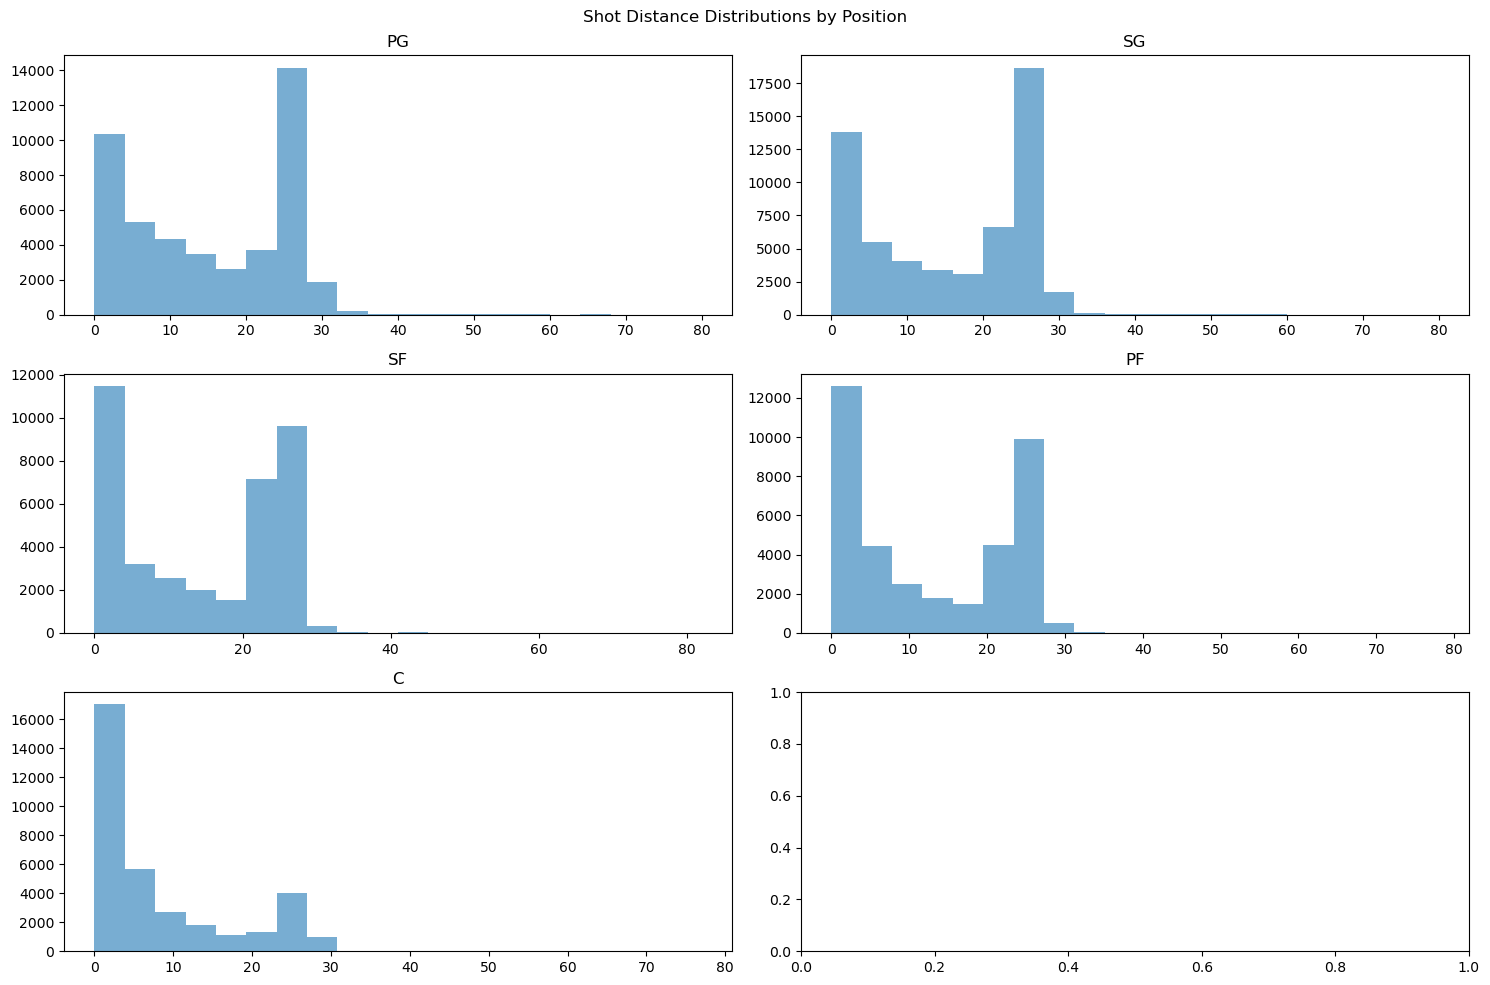

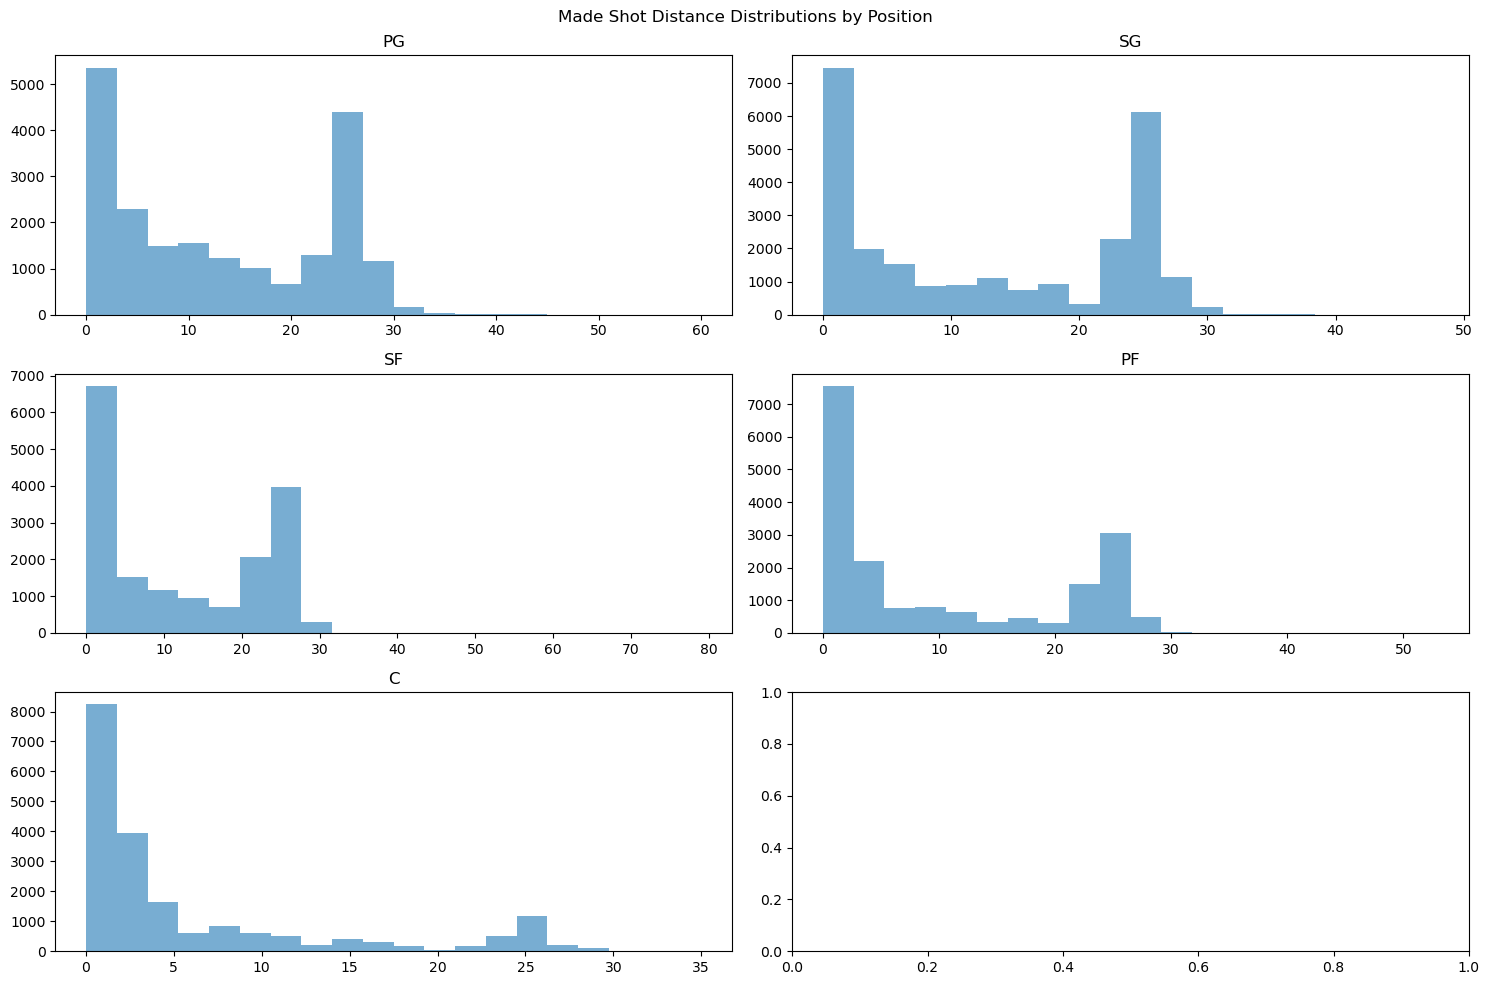

In [26]:
#now to do the same by position

positions = ['PG', 'SG', 'SF', 'PF', 'C']

fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns

for i, position in enumerate(positions):
    filtered_data = shot_data[shot_data["POSITION"] == position]
    row, col = divmod(i, 2)  # Calculating row and column indices
    axs[row, col].hist(filtered_data["SHOT_DISTANCE"], label=position, alpha=0.6, bins=20)
    axs[row, col].set_title(f"{position}")

fig.suptitle("Shot Distance Distributions by Position")
plt.tight_layout()  # Adjust spacing
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns

for i, position in enumerate(positions):
    filtered_data = made_shots[made_shots["POSITION"] == position]
    row, col = divmod(i, 2)  # Calculating row and column indices
    axs[row, col].hist(filtered_data["SHOT_DISTANCE"], label=position, alpha=0.6, bins=20)
    axs[row, col].set_title(f"{position}")

fig.suptitle("Made Shot Distance Distributions by Position")
plt.tight_layout()  # Adjust spacing
plt.show()



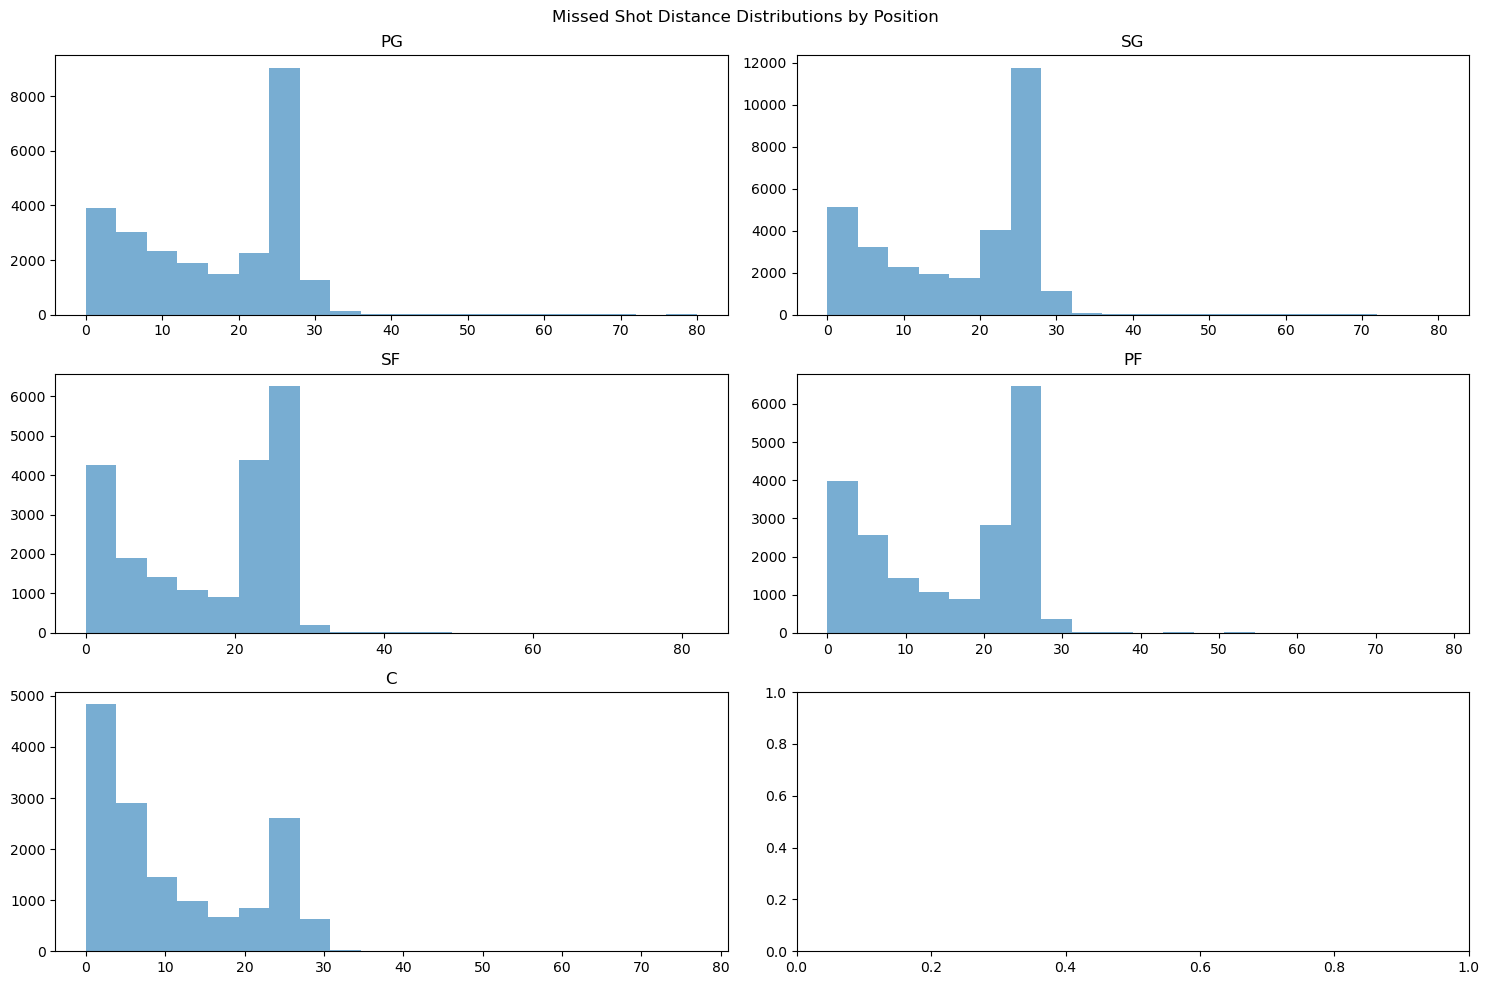

In [27]:
#upper part is getting cluttered. adding a new cell

fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns

for i, position in enumerate(positions):
    filtered_data = missed_shots[missed_shots["POSITION"] == position]
    row, col = divmod(i, 2)  # Calculating row and column indices
    axs[row, col].hist(filtered_data["SHOT_DISTANCE"], label=position, alpha=0.6, bins=20)
    axs[row, col].set_title(f"{position}")

fig.suptitle("Missed Shot Distance Distributions by Position")
plt.tight_layout()  # Adjust spacing
plt.show()

#no outliers here, either. looks good enough for analysis.

In [28]:
#lastly I want to see if the ranges are consistent with the zones

#for reference: 'Left Corner 3' 'Above the Break 3' 'Restricted Area' 'Mid-Range' 'In The Paint (Non-RA)' 'Right Corner 3' 'Backcourt'

left3 = shot_data[shot_data["BASIC_ZONE"] == "Left Corner 3"]
break3 = shot_data[shot_data["BASIC_ZONE"] == "Above the Break 3"]
restricted = shot_data[shot_data["BASIC_ZONE"] == "Restricted Area"]
midrange = shot_data[shot_data["BASIC_ZONE"] == "Midrange"]
paint = shot_data[shot_data["BASIC_ZONE"] == "In The Paint (Non-RA)"]
right3 = shot_data[shot_data["BASIC_ZONE"] == "Right Corner 3"]
backcourt = shot_data[shot_data["BASIC_ZONE"] == "Backcourt"]

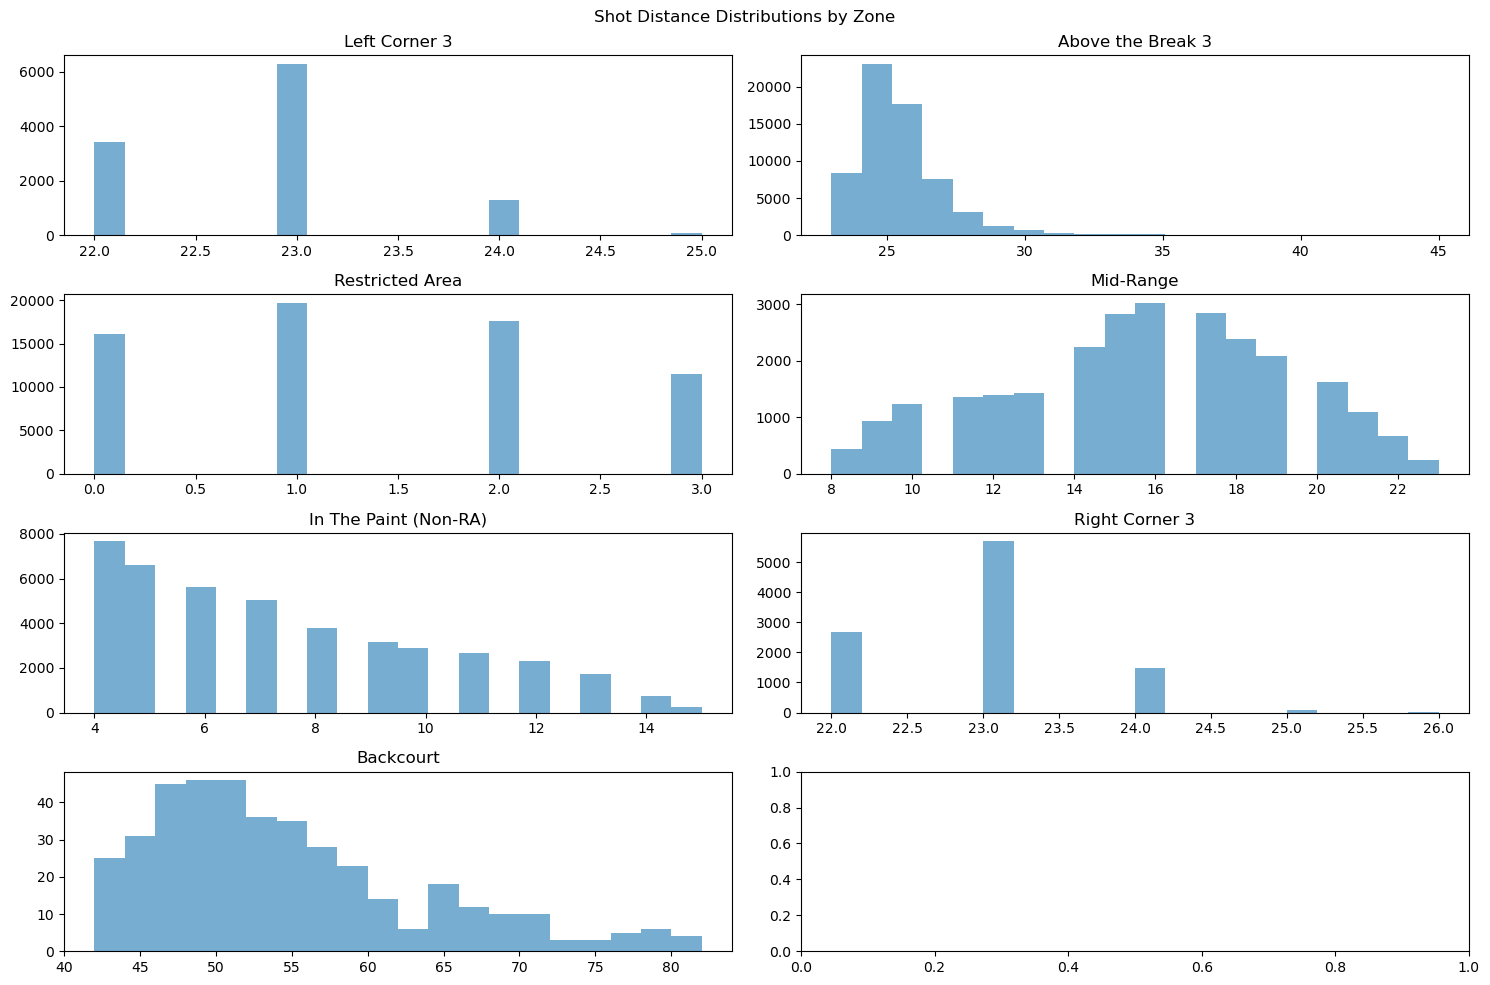

In [29]:
zones = ['Left Corner 3', 'Above the Break 3', 'Restricted Area', 'Mid-Range', 'In The Paint (Non-RA)', 'Right Corner 3', 'Backcourt']

fig, axs = plt.subplots(4, 2, figsize=(15, 10))  # 3 rows, 2 columns

for i, zone in enumerate(zones):
    filtered_data = shot_data[shot_data["BASIC_ZONE"] == zone]
    row, col = divmod(i, 2)  # Calculating row and column indices
    axs[row, col].hist(filtered_data["SHOT_DISTANCE"], label=zone, alpha=0.6, bins=20)
    axs[row, col].set_title(f"{zone}")

fig.suptitle("Shot Distance Distributions by Zone")
plt.tight_layout()  # Adjust spacing
plt.show()

In [30]:
#still nothing out of the ordinary. it looks good to go!

shot_df.shape

(217220, 27)

In [31]:
datapath = r'C:\Users\flash\Documents\Coding Projects\Springboard Projects\Data Wrangling'
#save_file(shot_df, 'shot_data.csv', datapath)

shot_df.to_csv('shot_data.csv', index=False)